<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/aplicacao_naive_bayes_para_filtragem_de_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação de Naive Bayes para Filtragem de Spam
O objetivo principal desta tarefa é construir um modelo de aprendizado de máquina capaz de classificar e-mails como spam (indesejados) ou não spam (ham, desejados). Essa é uma aplicação comum de classificação de texto.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Carregando o conjunto de dados Spambase (disponível em https://archive.ics.uci.edu/ml/datasets/spambase)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
col_names = [f"Feature_{i}" for i in range(57)] + ['is_spam']
df = pd.read_csv(url, header=None, names=col_names)

In [4]:
# identificar qual coluna é a nossa variável alvo (is_spam) e quais são as características que usaremos para prever essa variável (as colunas Feature_0 até Feature_56).
X = df.drop('is_spam', axis=1)
y = df['is_spam']

In [5]:
# instanciar o CountVectorizer, convertendo cada linha de nossas características X em uma string antes de passá-la para o vetorizador
vectorizer = CountVectorizer()
X_str = X.astype(str).apply(lambda row: ' '.join(row), axis=1)
X_vectorized = vectorizer.fit_transform(X_str)

In [7]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

X_vectorized: São os dados de características vetorizados.
y: É a variável dependente (os rótulos de spam).
test_size=0.2: Especifica que 20% dos dados serão separados para o conjunto de teste, e consequentemente, 80% para o conjunto de treinamento.
random_state=42: Garante que a divisão dos dados seja a mesma cada vez que executar o código. Isso é útil para garantir a reprodutibilidade dos resultados.

In [8]:
# instanciar o modelo
model = MultinomialNB()

In [9]:
# ajustando o modelo aos nossos dados de treinamento (X_train e y_train)
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
# avaliação do modelo com predict
y_pred = model.predict(X_test)

In [11]:
# calculando as métricas acurácia, precisão, recall e F1-score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       531
           1       0.60      0.51      0.55       390

    accuracy                           0.65       921
   macro avg       0.64      0.63      0.63       921
weighted avg       0.64      0.65      0.64       921



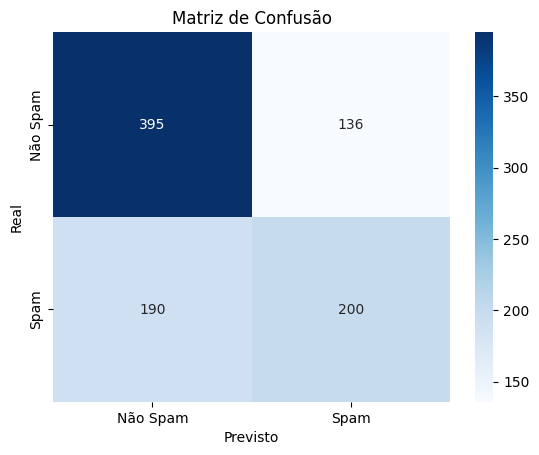

In [12]:
# construindo e visualizando a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Spam', 'Spam'], yticklabels=['Não Spam', 'Spam'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Análise: o número de Spam Real (190 + 200 = 390) é maior do que o número de Spam Previsto (136 + 200 = 336). Isso indica que o modelo está deixando passar alguns e-mails de spam (falsos negativos).